# Usage of GAEngine to solve TSP

#### In this example we are going to walk through the usage of GAEngine to solve the Travelling Salesman problem 

#### Each configuration of a route represents a potential candidate solution for the problem
#### But to find  the optimal solution each candidate will be tested for fitness value which would represent shortest path route between all places . The operations for performing selection, crossover and mutation are present in Utils.py module under respective classes . There is also support for adaptively changing mutation after every iteration which is represented by adaptive mutation instance  variable of GAEngine. Changing mutation rate helps increase the diversity of candidates which can lead to finding optimal solutions quicker. The number of iterations can be set by user.

In [4]:
import sys 
sys.path.append('../../pyGenetic/')

import GAEngine, ChromosomeFactory, Utils
import matplotlib.pyplot as plt
%matplotlib inline


### Sample input matrix for TSP problem

In [2]:
matrix = [[0,172,145,607,329,72,312,120],
          [172,0,192,494,209,158,216,92],
          [145,192,0,490,237,75,205,100],
          [607,494,490,0,286,545,296,489],
          [329,209,237,286,0,421,49,208],
          [72,158,75,545,421,0,249,75],
          [312,216,205,296,49,249,9,194],
          [120,92,100,489,208,75,194,0]]

#### Here ChromosomeRangeFactory is used to generate initial population of candidates. The first argument is number of genes for each candidate , then lower and upper limit on indexes for different places. Fitness_type is 'min' since we want the fitness value to be minimum for optimal candidate.

First men =  [[4, 6, 2, 7, 1, 0, 3, 5], [6, 2, 3, 7, 4, 1, 0, 5], [3, 5, 4, 7, 1, 0, 2, 6], [0, 5, 2, 6, 4, 7, 3, 1], [1, 6, 3, 2, 4, 7, 5, 0], [0, 6, 2, 7, 3, 4, 5, 1], [4, 2, 6, 1, 3, 7, 0, 5], [6, 4, 0, 3, 7, 2, 5, 1], [7, 2, 4, 1, 3, 6, 0, 5], [5, 1, 2, 7, 4, 3, 0, 6], [1, 3, 5, 6, 7, 4, 2, 0], [5, 0, 4, 1, 6, 3, 7, 2], [3, 4, 6, 7, 0, 1, 5, 2], [3, 2, 7, 4, 6, 0, 5, 1], [5, 4, 1, 2, 0, 6, 7, 3], [6, 4, 0, 5, 7, 1, 3, 2], [7, 6, 4, 2, 1, 5, 0, 3], [0, 7, 2, 6, 5, 3, 4, 1], [0, 6, 3, 7, 2, 5, 4, 1], [4, 1, 7, 5, 3, 0, 6, 2], [0, 7, 3, 5, 6, 1, 4, 2], [2, 4, 5, 3, 6, 1, 7, 0], [6, 0, 1, 3, 7, 4, 5, 2], [1, 6, 7, 0, 2, 3, 5, 4], [4, 0, 3, 1, 6, 2, 5, 7], [3, 1, 7, 0, 5, 6, 2, 4], [2, 0, 5, 1, 6, 4, 3, 7], [3, 6, 5, 4, 0, 7, 1, 2], [5, 2, 4, 3, 6, 0, 7, 1], [0, 4, 1, 6, 5, 7, 2, 3], [4, 1, 6, 3, 2, 5, 0, 7], [0, 5, 3, 4, 2, 6, 7, 1], [1, 7, 2, 3, 4, 5, 6, 0], [5, 6, 1, 2, 4, 3, 7, 0], [1, 6, 7, 2, 3, 4, 5, 0], [0, 5, 7, 4, 6, 2, 3, 1], [0, 3, 4, 2, 7, 1, 5, 6], [0, 6, 4, 7, 3, 1, 2, 5]

C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'v' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'g' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


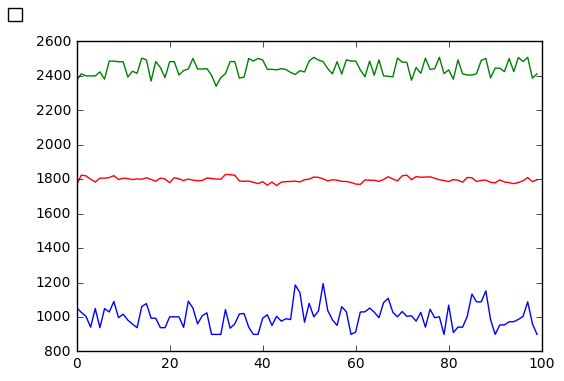

diversity [27.150873945418407, 20.677810300423538, 17.677539129880444, 16.131846156613825, 14.529549244690005, 14.073891374627188, 12.702020015245003, 13.040637459811668, 12.463227263335577, 13.520492116743192, 13.18171284756618, 12.663195437875642, 12.284316762629443, 12.169818233029359, 11.797683625414404, 11.675836784895628, 12.26102697575706, 11.784763842166276, 12.335917073381216, 12.507548512379168, 12.299901088433908, 11.566139892804038, 11.614199653353412, 12.44711408351657, 12.299892981533283, 11.936152702581293, 12.108012967365312, 12.364639417957495, 12.330471727843939, 11.86765048969453, 11.854129404353783, 11.807038725252065, 12.017032017023263, 11.862987128184407, 12.008956849802814, 12.366289494595915, 12.283728464363914, 12.881505944645024, 12.622461558483874, 12.532559843549839, 12.321563042335779, 12.766945996475169, 12.059784574882636, 12.280922238267232, 12.466729516449846, 12.332703683294666, 12.562052059258106, 12.105838517933973, 11.933222301522306, 12.1738017395

C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'm' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matplotlib

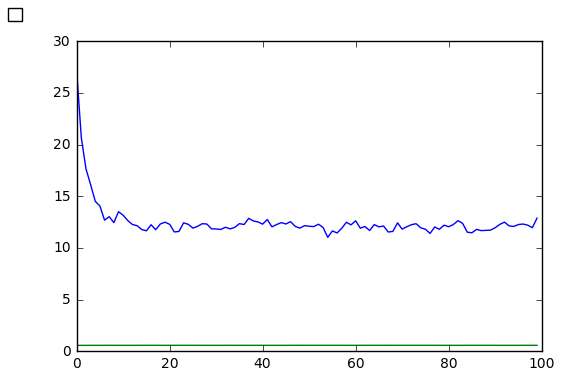

mutation_rate [0.5849322377109104, 0.5881579183425708, 0.5896185214299989, 0.5898873830885107, 0.5918030208441266, 0.5911305888111434, 0.5928217033918447, 0.5924912885403772, 0.5932170650475446, 0.5919642094109093, 0.5923152271267463, 0.5923613165767327, 0.5924115010091541, 0.5923151727199707, 0.5934017286919121, 0.5935710219182181, 0.5926818846169875, 0.5929628129727388, 0.5922116484170963, 0.5921047138245533, 0.5927169235434315, 0.5931464388722132, 0.5931182875033773, 0.5921588628495177, 0.5933170909135972, 0.5932686828966599, 0.5925267483823703, 0.5927221493036972, 0.5928610773893664, 0.5921826290680225, 0.5921914196653383, 0.5922220372329728, 0.5931657793273449, 0.5924827642714192, 0.5925871319815471, 0.5927988970792153, 0.5928602603379378, 0.5918974175318212, 0.5916923098602211, 0.5917506666932221, 0.5926461959066821, 0.5925322534248325, 0.5924865819746344, 0.5927494916201598, 0.5924326864157288, 0.5926175987446232, 0.5924443484793794, 0.5939375112972111, 0.593795192613804, 0.5925

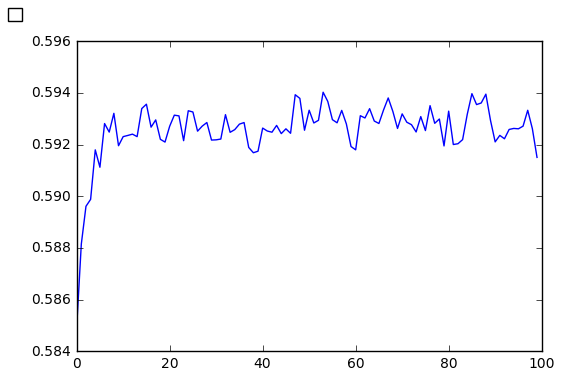

mutation_handlers_weights =  [1.0]
crossover_handlers_weights =  [0.23684210526315788, 0.5789473684210527, 1.0]
Best member =  [3, 6, 4, 1, 7, 5, 0, 2]
Best fitness =  938
Diversity =  12.688829134321258
Adaptive mutation value =  0.5919918092573726
Best member =  [3, 6, 4, 1, 0, 5, 7, 2]
Best fitness =  973
Diversity =  12.303800405078102
Adaptive mutation value =  0.5925076100995329
Best member =  [3, 6, 2, 0, 5, 7, 1, 4]
Best fitness =  1094
Diversity =  12.431512943805343
Adaptive mutation value =  0.5932585906321145
Best member =  [3, 6, 4, 2, 5, 0, 1, 7]
Best fitness =  993
Diversity =  11.947619813167808
Adaptive mutation value =  0.592866720865279
Best member =  [3, 4, 6, 2, 5, 0, 1, 7]
Best fitness =  951
Diversity =  11.889024970618914
Adaptive mutation value =  0.5925916540770739
Best member =  [3, 6, 4, 1, 0, 5, 2, 7]
Best fitness =  973
Diversity =  12.030534903818703
Adaptive mutation value =  0.5926719825563621
Best member =  [1, 7, 5, 0, 2, 6, 4, 3]
Best fitness =  924


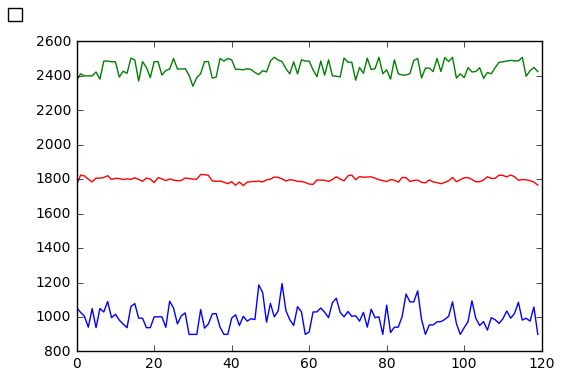

diversity [27.150873945418407, 20.677810300423538, 17.677539129880444, 16.131846156613825, 14.529549244690005, 14.073891374627188, 12.702020015245003, 13.040637459811668, 12.463227263335577, 13.520492116743192, 13.18171284756618, 12.663195437875642, 12.284316762629443, 12.169818233029359, 11.797683625414404, 11.675836784895628, 12.26102697575706, 11.784763842166276, 12.335917073381216, 12.507548512379168, 12.299901088433908, 11.566139892804038, 11.614199653353412, 12.44711408351657, 12.299892981533283, 11.936152702581293, 12.108012967365312, 12.364639417957495, 12.330471727843939, 11.86765048969453, 11.854129404353783, 11.807038725252065, 12.017032017023263, 11.862987128184407, 12.008956849802814, 12.366289494595915, 12.283728464363914, 12.881505944645024, 12.622461558483874, 12.532559843549839, 12.321563042335779, 12.766945996475169, 12.059784574882636, 12.280922238267232, 12.466729516449846, 12.332703683294666, 12.562052059258106, 12.105838517933973, 11.933222301522306, 12.1738017395

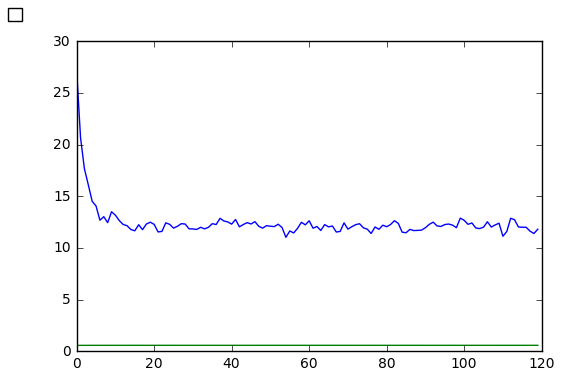

mutation_rate [0.5849322377109104, 0.5881579183425708, 0.5896185214299989, 0.5898873830885107, 0.5918030208441266, 0.5911305888111434, 0.5928217033918447, 0.5924912885403772, 0.5932170650475446, 0.5919642094109093, 0.5923152271267463, 0.5923613165767327, 0.5924115010091541, 0.5923151727199707, 0.5934017286919121, 0.5935710219182181, 0.5926818846169875, 0.5929628129727388, 0.5922116484170963, 0.5921047138245533, 0.5927169235434315, 0.5931464388722132, 0.5931182875033773, 0.5921588628495177, 0.5933170909135972, 0.5932686828966599, 0.5925267483823703, 0.5927221493036972, 0.5928610773893664, 0.5921826290680225, 0.5921914196653383, 0.5922220372329728, 0.5931657793273449, 0.5924827642714192, 0.5925871319815471, 0.5927988970792153, 0.5928602603379378, 0.5918974175318212, 0.5916923098602211, 0.5917506666932221, 0.5926461959066821, 0.5925322534248325, 0.5924865819746344, 0.5927494916201598, 0.5924326864157288, 0.5926175987446232, 0.5924443484793794, 0.5939375112972111, 0.593795192613804, 0.5925

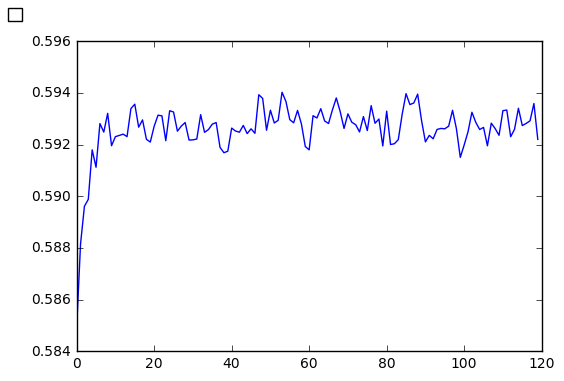

In [3]:
# best sequence i found: 0 5 2 7 1 6 4 3
factory = ChromosomeFactory.ChromosomeRangeFactory(8,0,8)
ga = GAEngine.GAEngine(factory,100,fitness_type='min',mut_prob = 0.3)
ga.addCrossoverHandler(Utils.CrossoverHandlers.PMX, 9)

	#ga = GAEngine(fitness,8,factory,20)#,fitness_type='equal')
	#ga.addCrossoverHandler(Utils.CrossoverHandlers.distinct, 9)



- The functions for performing crossover , mutation, selection and fitness function are present in Utils.py module as static methods
- Here we register the specific operations to be used by GAEngine 

In [8]:
ga.addCrossoverHandler(Utils.CrossoverHandlers.distinct, 4)
ga.addCrossoverHandler(Utils.CrossoverHandlers.OX, 3)
ga.addMutationHandler(Utils.MutationHandlers.swap)

ga.setSelectionHandler(Utils.SelectionHandlers.SUS)
ga.setFitnessHandler(Utils.Fitness.TSP, matrix)
	# ga.setSelectionHandler(Utils.SelectionHandlers.basic)
	# Provide max iteration here ???



- Calling the evolve function defined in Evolution.py module to perform each iteration
- function expects the number of iterations to be performed as argument , here 100



In [9]:
ga.evolve(100)


mutation_handlers_weights =  [0.14285714285714288, 0.5714285714285715, 1.0]
crossover_handlers_weights =  [0.0015495867768595037, 0.008436639118457299, 0.027203856749311292, 0.0840220385674931, 0.19851928374655645, 0.6565082644628099, 1.0]


TypeError: TSP() takes 2 positional arguments but 4 were given

best [1054, 1027, 1004, 941, 1049, 938, 1049, 1029, 1090, 996, 1016, 982, 959, 938, 1061, 1078, 993, 993, 938, 938, 1001, 1001, 1001, 940, 1092, 1052, 960, 1007, 1024, 899, 899, 899, 1043, 935, 960, 1018, 1020, 941, 899, 899, 993, 1013, 951, 1004, 976, 990, 985, 1186, 1142, 970, 1079, 1001, 1035, 1194, 1037, 984, 951, 1060, 1030, 899, 913, 1029, 1030, 1052, 1028, 996, 1083, 1109, 1027, 1001, 1032, 1004, 1007, 976, 1027, 941, 1045, 996, 1001, 899, 1069, 910, 941, 941, 1004, 1133, 1088, 1088, 1152, 986, 899, 954, 954, 972, 973, 986, 1004, 1088, 962, 899, 938, 973, 1094, 993, 951, 973, 924, 996, 984, 963, 990, 1035, 993, 1021, 1085, 982, 993, 976, 1058, 899]
worst [2374, 2412, 2400, 2400, 2400, 2423, 2381, 2486, 2486, 2482, 2482, 2393, 2427, 2415, 2503, 2493, 2370, 2483, 2449, 2390, 2482, 2483, 2405, 2431, 2440, 2501, 2440, 2440, 2442, 2404, 2340, 2390, 2413, 2483, 2483, 2387, 2393, 2501, 2486, 2501, 2493, 2438, 2438, 2435, 2442, 2437, 2420, 2408, 2430, 2423, 2486, 2508, 2492, 2483, 2442,

C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'v' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'g' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


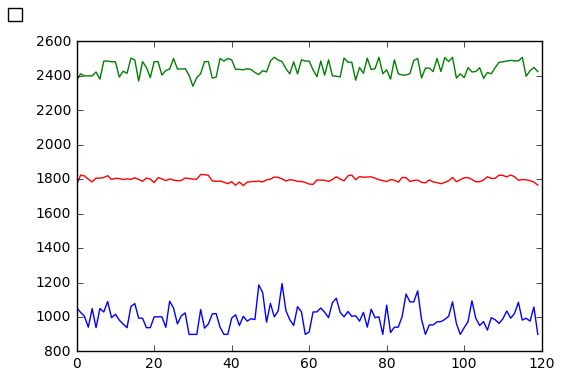

diversity [27.150873945418407, 20.677810300423538, 17.677539129880444, 16.131846156613825, 14.529549244690005, 14.073891374627188, 12.702020015245003, 13.040637459811668, 12.463227263335577, 13.520492116743192, 13.18171284756618, 12.663195437875642, 12.284316762629443, 12.169818233029359, 11.797683625414404, 11.675836784895628, 12.26102697575706, 11.784763842166276, 12.335917073381216, 12.507548512379168, 12.299901088433908, 11.566139892804038, 11.614199653353412, 12.44711408351657, 12.299892981533283, 11.936152702581293, 12.108012967365312, 12.364639417957495, 12.330471727843939, 11.86765048969453, 11.854129404353783, 11.807038725252065, 12.017032017023263, 11.862987128184407, 12.008956849802814, 12.366289494595915, 12.283728464363914, 12.881505944645024, 12.622461558483874, 12.532559843549839, 12.321563042335779, 12.766945996475169, 12.059784574882636, 12.280922238267232, 12.466729516449846, 12.332703683294666, 12.562052059258106, 12.105838517933973, 11.933222301522306, 12.1738017395

C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'm' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\Shreyas\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matplotlib

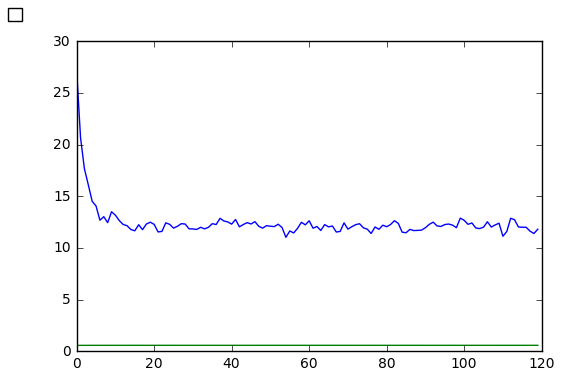

mutation_rate [0.5849322377109104, 0.5881579183425708, 0.5896185214299989, 0.5898873830885107, 0.5918030208441266, 0.5911305888111434, 0.5928217033918447, 0.5924912885403772, 0.5932170650475446, 0.5919642094109093, 0.5923152271267463, 0.5923613165767327, 0.5924115010091541, 0.5923151727199707, 0.5934017286919121, 0.5935710219182181, 0.5926818846169875, 0.5929628129727388, 0.5922116484170963, 0.5921047138245533, 0.5927169235434315, 0.5931464388722132, 0.5931182875033773, 0.5921588628495177, 0.5933170909135972, 0.5932686828966599, 0.5925267483823703, 0.5927221493036972, 0.5928610773893664, 0.5921826290680225, 0.5921914196653383, 0.5922220372329728, 0.5931657793273449, 0.5924827642714192, 0.5925871319815471, 0.5927988970792153, 0.5928602603379378, 0.5918974175318212, 0.5916923098602211, 0.5917506666932221, 0.5926461959066821, 0.5925322534248325, 0.5924865819746344, 0.5927494916201598, 0.5924326864157288, 0.5926175987446232, 0.5924443484793794, 0.5939375112972111, 0.593795192613804, 0.5925

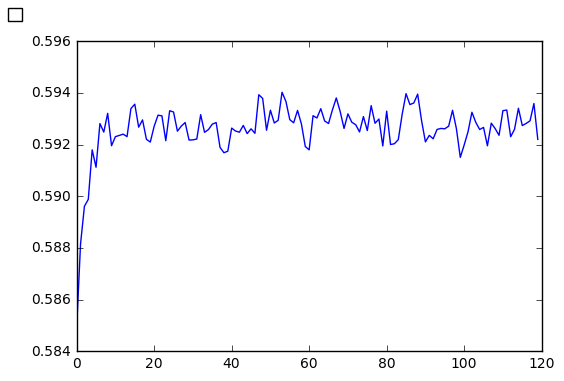

mutation_handlers_weights =  [0.08333333333333334, 0.4166666666666667, 1.0]
crossover_handlers_weights =  [0.0007841087297438577, 0.005053145147238195, 0.018818609513852586, 0.06133472730440843, 0.161787767903816, 0.4939884997386304, 1.0]


TypeError: TSP() takes 2 positional arguments but 4 were given

In [10]:
fig = ga.statistics.plot_statistics(['best','worst','avg'])
plt.show()
fig = ga.statistics.plot_statistics(['diversity','mutation_rate'])
plt.show()
fig = ga.statistics.plot_statistics(['mutation_rate'])
plt.show()

ga.continue_evolve(20)

fig = ga.statistics.plot_statistics(['best','worst','avg'])
plt.show()
fig = ga.statistics.plot_statistics(['diversity','mutation_rate'])
plt.show()
fig = ga.statistics.plot_statistics(['mutation_rate'])
plt.show()